In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)

In [4]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [5]:
# Select relevant columns
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]


In [6]:
# Check missing values
print(df.isnull().sum())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

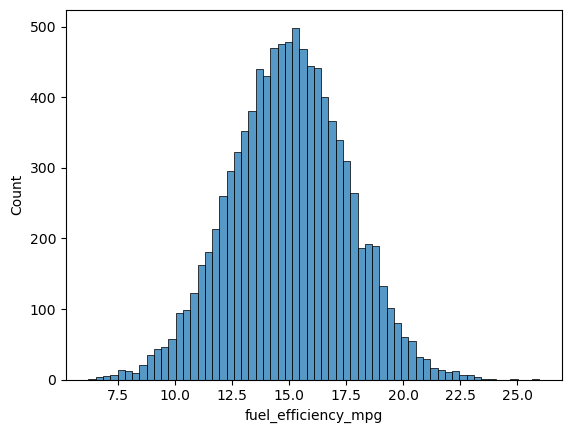

In [7]:
#Look at the fuel_efficiency_mpg variable. Does it have a long tail?
sns.histplot(df.fuel_efficiency_mpg)

In [8]:
df.horsepower.median()

149.0

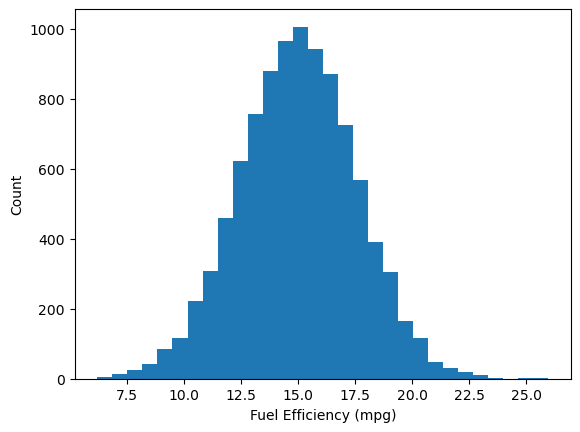

In [9]:
plt.hist(df['fuel_efficiency_mpg'], bins=30)
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Count')
plt.show()

In [10]:
# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# train_test_split: This is a function from sklearn that splits a dataset into two parts randomly.
# test_size=0.2: This means 20% of the dataset will be set aside as the test set, and the remaining 80% will be used for training/validation.
# random_state=42: This is a seed for the random number generator, which ensures that the split is reproducible. Every time you run the code with 42, you’ll get the exact same split.
# Result: df_test → 20% of the data → will only be used at the very end to evaluate the final model. 
#         df_full_train → 80% of the data → will be further split into training and validation sets.

# Input: df_full_train (the 80% of data from step 1).
# test_size=0.25: We are splitting 25% of df_full_train into a validation set. Calculation: 0.25 * 0.8 = 0.2 → This gives 20% of the original dataset as the validation set.
# Remaining 60% of the original dataset → training set (df_train). random_state=42 → ensures reproducibility again.
#Result: df_train → 60% of original dataset → used to train the model.
#        df_val → 20% of original dataset → used to tune hyperparameters and evaluate models during development.

In [13]:
# Train + temp split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Train/validation split
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['engine_displacement','horsepower','vehicle_weight','model_year']


In [15]:
# Separate target

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values

X_train = df_train[features].copy()
X_val = df_val[features].copy()


In [16]:
# OPTION 1: Fill with 0
X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

In [17]:
# Initialize a Linear Regression model
model = LinearRegression()
# Fit the linear regression model using training data. Inputs: X_train_0 → feature matrix (with missing horsepower filled with 0) : y_train → target variable (fuel efficiency)
model.fit(X_train_0, y_train)

# Make predictions on validation set. Purpose: Use the trained model to predict fuel efficiency on validation data (X_val_0). Validation data was not used during training, so this tests how well the model generalizes to unseen data.
y_pred_0 = model.predict(X_val_0)

# mean_squared_error(y_val, y_pred_0) → computes Mean Squared Error (MSE) ; np.sqrt() → takes square root to get Root Mean Squared Error (RMSE)
# RMSE has the same units as the target (mpg) and tells you, on average, how far off the predictions are.
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))
print("RMSE with 0:", round(rmse_0, 2))

RMSE with 0: 0.53


In [18]:
# OPTION 2: Fill NA with mean of training
mean_hp = X_train['horsepower'].mean()
X_train_mean = X_train.fillna(mean_hp)
X_val_mean = X_val.fillna(mean_hp)

model = LinearRegression()
model.fit(X_train_mean, y_train)
y_pred_mean = model.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))
print("RMSE with mean:", round(rmse_mean, 2))

RMSE with mean: 0.47


In [19]:
print("Question 3. Option with RMSE with mean:", round(rmse_mean, 2), "gives better RMSE")

Question 3. Option with RMSE with mean: 0.47 gives better RMSE


In [20]:
from sklearn.linear_model import LinearRegression, Ridge

In [21]:
# Question 4 – Regularized Linear Regression (Ridge)
# Calculate Root Mean Squared Error to measure prediction error
# RMSE is in the same units as fuel efficiency (mpg). Lower RMSE → better model
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train_0, y_train)
    y_pred = model.predict(X_val_0)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"r={r}, RMSE={round(rmse, 2)}")

r=0, RMSE=0.53
r=0.01, RMSE=0.53
r=0.1, RMSE=0.53
r=1, RMSE=0.53
r=5, RMSE=0.53
r=10, RMSE=0.53
r=100, RMSE=0.53


In [22]:
# Question 5 – Influence of seed. Test seeds [0,1,2,3,4,5,6,7,8,9]. Train linear regression, fill NA with 0, compute RMSE. Calculate standard deviation
# PURPOSE : Evaluate model stability across different random splits of the data.Ensure RMSE is not overly dependent on a specific train/val/test split.
#           Standard deviation is a good indicator of robustness.
#           We train the same model (Linear Regression) multiple times, each with a different random seed → different train/val/test split.
#           After each run, we compute RMSE on the validation set.Then we compute the standard deviation (std) of those RMSE scores.
#           If std is small → the RMSE values are all very close to each other.
#          If std is large → the RMSE values differ significantly depending on the split.

# seeds = range(10) → will test 10 different random seeds (0 to 9) for splitting the data. rmse_scores = [] → to store the RMSE of each split.
# Purpose: Check how sensitive your model’s performance is to the choice of random seed.
# for seed in seeds: Repeat the train/validation/test split 10 times with different random orders of the data. Helps measure stability of the model.
# First split: 80% train+val, 20% test. Second split: 75% train, 25% val of the 80% → results in 60/20/20 split. Each seed produces a different random split.
# fillna(0) → replace missing values in horsepower with 0. X_train, X_val → feature matrices; y_train, y_val → target arrays
# Fit Linear Regression on training data. Predict on validation set
# RMSE will measure how well the model generalizes.
# rmse: Compute Root Mean Squared Error (RMSE). Append it to rmse_scores for this seed. Repeats for all seeds.
# np.std(rmse_scores) → measures how much the RMSE varies across seeds
# Low standard deviation → model is stable, performance doesn’t change much with data shuffling. High standard deviation → model is sensitive to the split


In [23]:

seeds = range(10)
rmse_scores = []

for seed in seeds:
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)
    
    X_train = df_train[features].fillna(0)
    y_train = df_train['fuel_efficiency_mpg'].values
    X_val = df_val[features].fillna(0)
    y_val = df_val['fuel_efficiency_mpg'].values
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

std_rmse = np.std(rmse_scores)
print("Standard deviation of RMSEs:", round(std_rmse, 3))

Standard deviation of RMSEs: 0.009


In [24]:
# CONCLUTION:
#          The low standard deviation shows that our linear regression model is stable, because:
#          It’s deterministic (no randomness in training). The dataset splits don’t drastically change the feature-target relationship.
#          Strong predictors + simple preprocessing = consistent performance.

In [25]:
# Question 6 – Train on train+val, test on test
# Use seed 9
# Combine train+val
# Fill missing with 0
#Train Ridge with r=0.001
# Split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=9)

# join train + validation = 80% of the data into one set (df_train_combined). 
# Purpose: Use all possible data (except test) to train a stronger model before final testing.
df_train_combined = pd.concat([df_train, df_val])
X_train_combined = df_train_combined[features].fillna(0)
y_train_combined = df_train_combined['fuel_efficiency_mpg'].values
X_test = df_test[features].fillna(0)
y_test = df_test['fuel_efficiency_mpg'].values

# Predict fuel efficiency on the unseen test set.
#Calculate RMSE (Root Mean Squared Error) → lower RMSE = better predictions.
# Purpose: Measure final model accuracy on completely unseen data.
model = Ridge(alpha=0.001)
model.fit(X_train_combined, y_train_combined)
y_pred_test = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on test:", round(rmse_test, 3))


RMSE on test: 0.524
